<a href="https://colab.research.google.com/github/ioloi1128/IPCS1112_CDA/blob/main/CDA_week15_IPCS1128_2023spring_part3_shapley_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 15: Basics of Machine learning Part 3: Uing shapeley value to understand random forest model for Iris classification**

This jupyter notebook aims to explain a method using shapeley value based on game theory to understand the feature importance of our random forest for predicting Iris class. 
Basic concepts include:
1. data wrangling (part 1)
2. sklearn framework (part 1)
3. overfitting/underfitting, regularization (part 1)
4. random forest (part 2)
5. physical explainability (part 2)
6. shapley value (part 3)

# **Reference:**
### [1] SHAP (SHapley Additive exPlanations) python package
See [here](https://github.com/slundberg/shap) for the github page of Shap python package.
See [here](https://shap.readthedocs.io/en/latest/) for the documentation of the package.
S. Lundberg, SHAP Python package (2021)

### [2] Interpretable Machine Learning by Christoph Molnar
9.5 Shapley Values

https://christophm.github.io/interpretable-ml-book/shapley.html
https://christophm.github.io/interpretable-ml-book/shap.html


This material is prepared by Dr.Yi-Chi Wang and used for NTU IPCS class (Spring 2023) only.

## Load Iris data and build a random forest model for Iris classification. 

To explore feature importance of random forest model, we first reload the Iris data and randome forest model we built last week.
Besides tree-based models, the SHAP package can also be applied to several other models, including transformer and simple neural network models.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-1-164f59effc58>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
# https://en.wikipedia.org/wiki/Iris_flower_data_set
from sklearn.datasets import load_iris
data = load_iris()
#print(data)

In [ ]:
# read the feature data into pandas dataframe with 'feature_names' as columns
import pandas as pd

X = pd.DataFrame(data['data'],columns=data['feature_names'])
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# # read the target data into pandas dataframe with 'target_names' as columns
y = pd.DataFrame(data['target'],columns=['target_names'])
y.head()

,target_names
0,0
1,0
2,0
3,0
4,0


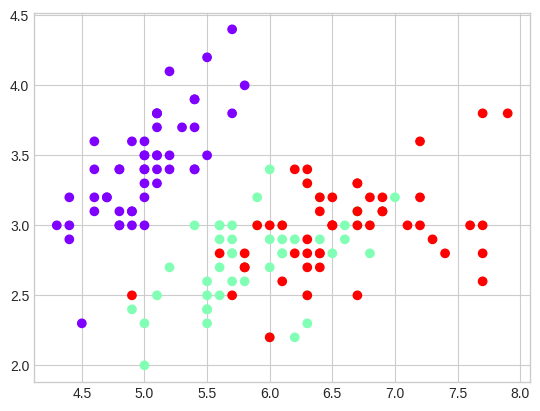

In [ ]:
#from sklearn.datasets import make_blobs

#X, y = make_blobs(n_samples=300, centers=4,
#                  random_state=0, cluster_std=1.0)
Xdata=X.values
ydata=y.values

fig, ax = plt.subplots()
ax.scatter(Xdata[:, 0], Xdata[:, 1],c=ydata,cmap='rainbow')
#ax.legend('versicolor', 'virginica')


In [ ]:
# split the data into training and test data
from sklearn.model_selection import train_test_split
[X_train,X_test,y_train,y_test]=train_test_split(X,y)

# Use random forest model
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
y_rfpred = rfclassifier.predict(X_test)

<ipython-input-6-c866c06e1dec>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclassifier = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, r2_score
# calculate the confusion matrix
#from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, r2_score
print(f"F1 Score: {round(f1_score(y_test, y_rfpred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_rfpred), 2)}")

F1 Score: 0.88
Accuracy: 0.87


### introduction of Shapeley value

The Shapley value is based on a concept of game theory, which is used to compute the contribution from each players in a game.
When using in understanding interpretability of a machine learning model, we can translate the player into the features and the game's outcome into model results.


We will use the shap package developed in ().
Documentation of this package can be found here (https://github.com/slundberg/shap).

This package shows the shapley values as a forcing of expected values.
<img src='https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/shap_header.svg'>


### Classification example of random forest with iris flower data

Here, we will use the iris flower dataset and our random forest model to explore the interpretability of a tree-based model.
In addition to the impurity measure which we introduced last week, we will use the SHAP package to understand the feature importance for model results from the random forest model we just built. 

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.5 MB/s eta 0:00:00


In [ ]:
import shap 
explainer = shap.Explainer(rfclassifier)
shap_test = explainer(X_test)
print(f"Shap values length: {len(shap_test)}\n")
#print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 38



## Two scopes of physical interpretability
1. global interpretability
2. local interpretability

### Summary plot of global interpretability

Global interpretability helps us to understand relationship betwween each features and predictions. 

**reference:**

https://medium.com/ai-academy-taiwan/explain-your-machine-learning-model-by-shap-part-1-228fb2a57119

The shape package shows the importance of each feature on each classes and for each sample.
We start from checking the summary of importance of the four features on the 3 Iris classes.
Here, class 0 as 'setosa', class 1 as 'versicolor', and class 2 as 'virginica'.

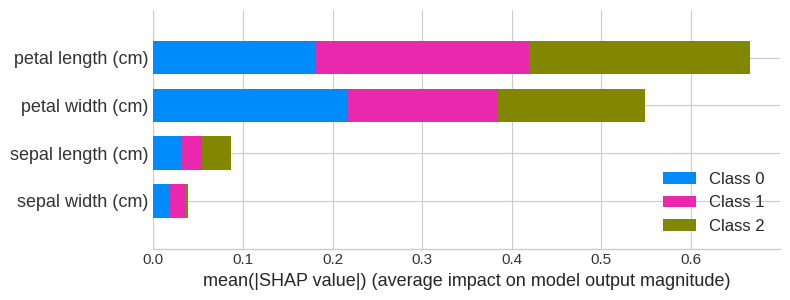

In [ ]:
# Check global interpretability for the model.
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


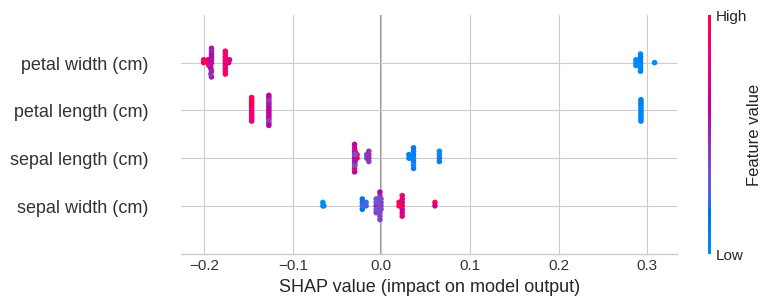

In [ ]:
# Beeswarm plot for the 1st class:  'setosa'
shap.plots.beeswarm(shap_test[:,:,0])

(38, 4, 3)


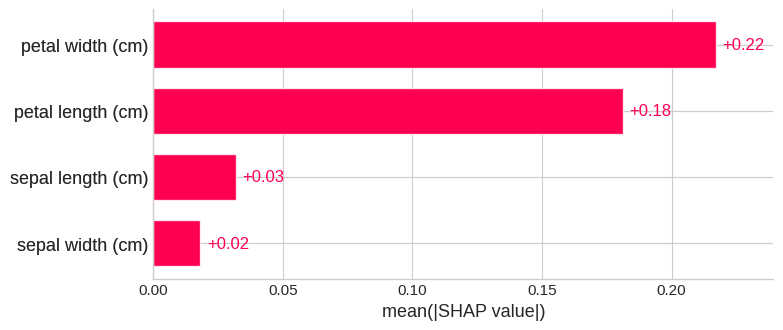

In [ ]:
#shap_test(# of length, features, classification)
print(shap_test.shape)
# visualize the first prediction's explanation
#shap.plots.waterfall(shap_test[0])
#shap.summary_plot(shap_test.values)

# plot the impacts of each features on the 1st class: 'setosa'
shap.plots.bar(shap_test[:,:,0])


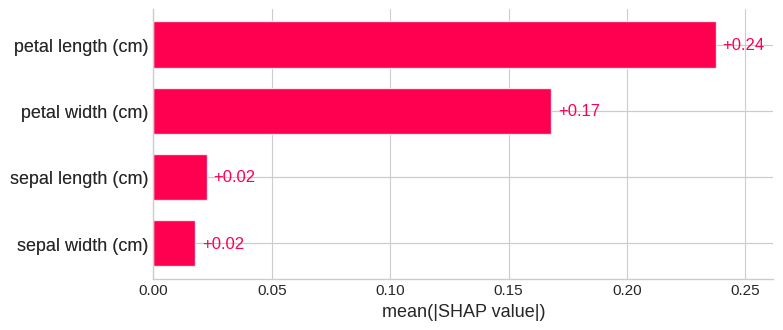

In [ ]:
# plot the impacts of each features on the 2nd class: 'versicolor'
shap.plots.bar(shap_test[:,:,1])


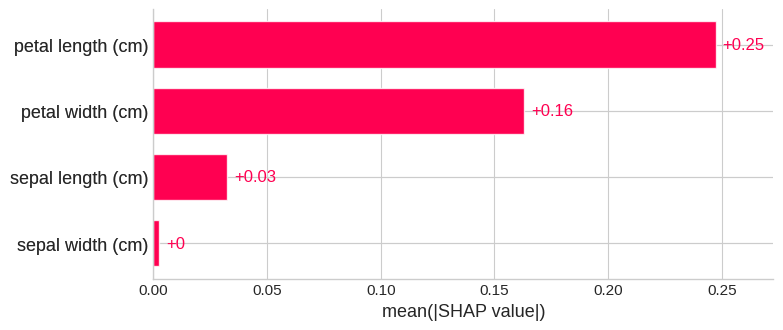

In [ ]:
# plot the impacts of each features on the 3rd class: 'virginica'
shap.plots.bar(shap_test[:,:,2])


## Dependence plot for Iris classification 
To understand how feature values contribute to certain classification,
we can use dependent plots for each class.

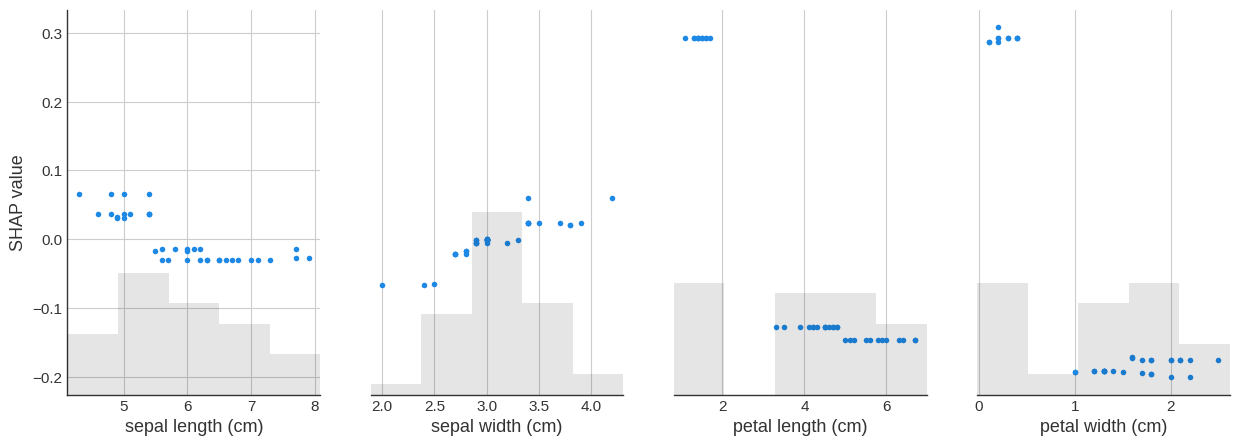

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the first class, 'setosa'.
shap.plots.scatter(shap_test[:,:,0])

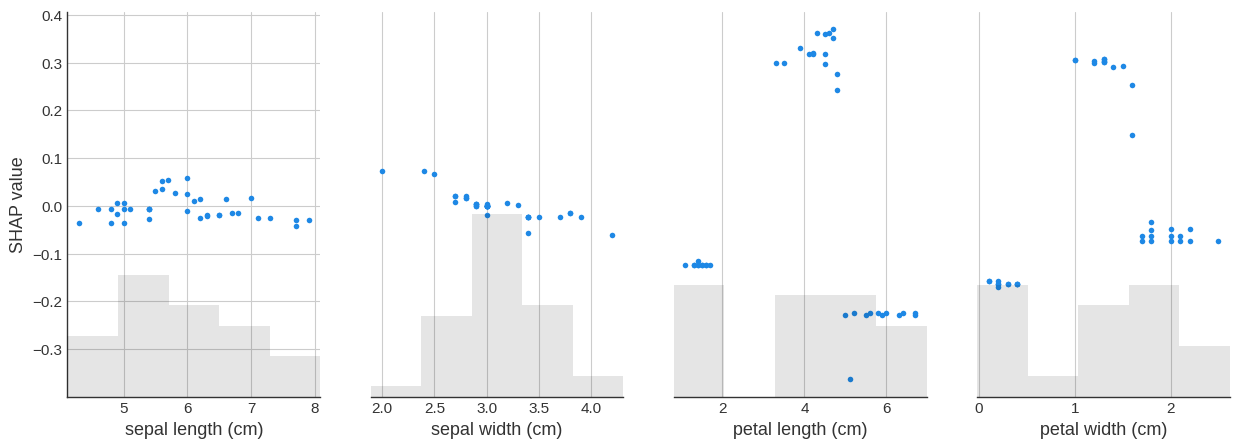

In [ ]:
# 'versicolor'
shap.plots.scatter(shap_test[:,:,1])

### Visualize a single prediction

One of the fundemental properties of Shapley values is that they always sum up to the difference between the game outcome when all players are present and the game outcome when no players are present. For machine learning models this means that SHAP values of all the input features will always sum up to the difference between baseline (expected) model output and the current model output for the prediction being explained. 
The easiest way to see this is through a waterfall plot that starts at our background prior expectation for a class of Iris, and then adds features one at a time until we reach the current model output.

The following example shows how the first prediction is classified as the 3rd class (i.e. f(x)=1 at the first prediction).

In [ ]:
#pd_shap = pd.DataFrame(shap_test.val3ues)

# shap_test: a tuple with 38 shapley elements; each element has 4 items; each item with 3 subitems.
print(len(shap_test))
#print(shap_test.values)
[len(a) for a in shap_test]

len(shap_test[:,:,0])

print(shap_test[0])

38
.values =
array([[-0.01463745, -0.04216111,  0.05679855],
       [-0.01723485,  0.01529391,  0.00194094],
       [-0.14642857, -0.22798453,  0.3744131 ],
       [-0.17616342, -0.06300542,  0.23916884]])

.base_values =
array([0.35446429, 0.31785714, 0.32767857])

.data =
array([7.7, 2.8, 6.7, 2. ])


In [ ]:
#print(shap_test)

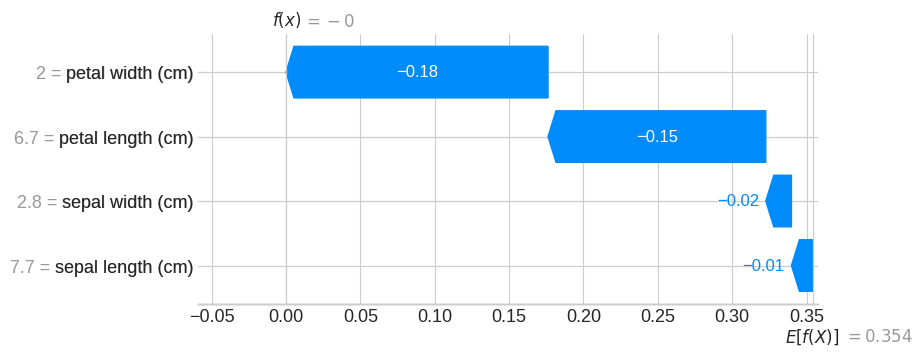

In [ ]:
shap.plots.waterfall(shap_test[:,:,0][0])

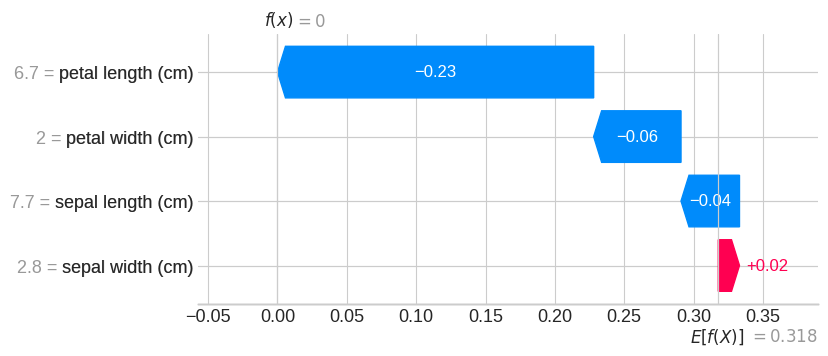

In [ ]:
shap.plots.waterfall(shap_test[:,:,1][0])

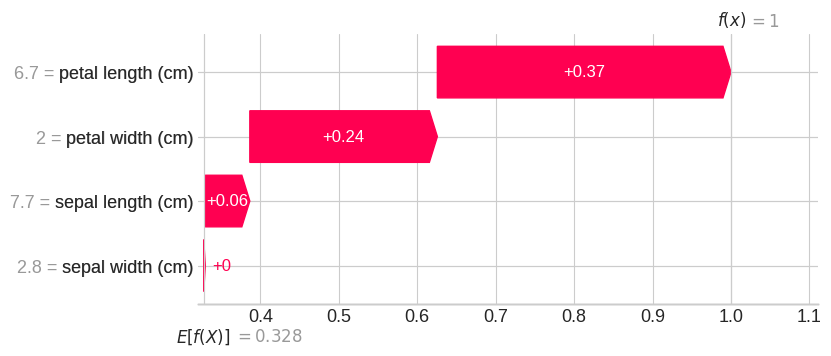

In [ ]:
shap.plots.waterfall(shap_test[:,:,2][0])

## Using forcing plots to visualize importance of the 1st prediction.

In [ ]:
shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values[0], feature_names = explainer.data_feature_names)
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

If we cluster the forcing plots of all predictions and rotate them for 90, we can plot the following forcing plot for all predictions.

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

# visualize all the training set predictions
shap.plots.force(explainer.expected_value[0], shap_values[0])



# Take-home exercise: 
I. Please use the SHAP package to explain feature importance based on the random forest model you built. Explain in both global interpretability and local intertability with supports from the figures.

II. ENSO: 
https://github.com/ioloi1128/IPCS1102_CDA/blob/main/CDA_week10_1_EOF_partIII_globalSST.ipynb

1. global SST EOF analysis (mode=3)
2. nino3.4 => [0,1,2]
3. Tree model
4. Shap